In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform
from tqdm import tqdm

h = 128  
w = 128  

input_folder = "data/agrupa-las-cartas-marzo-2025/train"
output_folder = "data/agrupa-las-cartas-marzo-2025/train_resized"
os.makedirs(output_folder, exist_ok=True)

# Procesar imágenes
for filename in tqdm(os.listdir(input_folder)):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(input_folder, filename)
        img = io.imread(img_path)
        
        resized_img = transform.resize(img, (h, w), anti_aliasing=True)
        io.imsave(os.path.join(output_folder, filename), (resized_img * 255).astype(np.uint8))

print("Redimensionado completado. Imágenes guardadas en 'train_resized'.")

# Mostrar ejemplo de imagen transformada
sample_img = io.imread(os.path.join(output_folder, os.listdir(output_folder)[0]))
plt.imshow(sample_img)
plt.axis("off")
plt.show()

 15%|█████████████████▎                                                                                                | 1200/7889 [01:01<05:42, 19.53it/s]

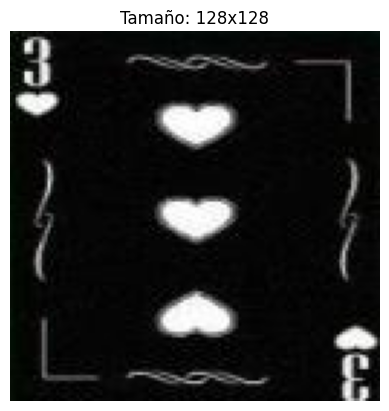

Tamaño de la imagen: 128x128


In [4]:
import os
import matplotlib.pyplot as plt
from skimage import io

# Ruta de la carpeta con las imágenes redimensionadas
resized_folder = "data/agrupa-las-cartas-marzo-2025/train_resized"

# Cargar una imagen de ejemplo
sample_img_path = os.path.join(resized_folder, os.listdir(resized_folder)[0])  # Tomamos la primera imagen
sample_img = io.imread(sample_img_path)

# Mostrar la imagen
plt.imshow(sample_img)
plt.axis("off")
plt.title(f"Tamaño: {sample_img.shape[0]}x{sample_img.shape[1]}")
plt.show()

# Verificar tamaño de la imagen
print(f"Tamaño de la imagen: {sample_img.shape[0]}x{sample_img.shape[1]}")

In [ ]:
import os
from skimage import io, color
import numpy as np
from tqdm import tqdm

# Directorios
input_folder = "data/agrupa-las-cartas-marzo-2025/train_resized"
output_folder = "data/agrupa-las-cartas-marzo-2025/train_resized_bw"
os.makedirs(output_folder, exist_ok=True)

# Convertir imágenes a blanco y negro
for filename in tqdm(os.listdir(input_folder)):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(input_folder, filename)
        img = io.imread(img_path)
        
        # Convertir a escala de grises
        bw_img = color.rgb2gray(img)  # La imagen será flotante [0, 1]
        
        # Guardar la imagen en formato uint8 para que sea [0, 255]
        bw_img_uint8 = (bw_img * 255).astype(np.uint8)
        io.imsave(os.path.join(output_folder, filename), bw_img_uint8)

print("Conversión a blanco y negro completada. Imágenes guardadas en 'train_resized_bw'.")

  7%|███████▌                                                                                                           | 520/7889 [00:17<04:04, 30.14it/s]

In [2]:
import os
import numpy as np
from skimage import io
from skimage.filters import median
from skimage.morphology import disk
from skimage.transform import rotate
from tqdm import tqdm

# Ruta de las imágenes en blanco y negro
bw_folder = "data/agrupa-las-cartas-marzo-2025/train_resized_bw"

# Crear una lista para almacenar los datos de las imágenes
image_data = []

# Procesar todas las imágenes en la carpeta
for filename in tqdm(os.listdir(bw_folder)):
    # Solo procesamos imágenes .jpg
    if filename.lower().endswith('.jpg'):
        img_path = os.path.join(bw_folder, filename)
        try:
            img = io.imread(img_path)
            # Recortar la esquina superior izquierda (1/4 de la imagen) y normalizar
            img_cropped = img[:64, :64]  # Recorte de 64x64 en la esquina superior izquierda
            img_normalized = img_cropped / 255.0  # Normalización
            
            # Reducir el ruido de la imagen
            img_filtered = median(img_normalized, disk(3))  # Filtro de mediana

            # Aumento de datos (rotación aleatoria)
            img_rotated = rotate(img_filtered, angle=np.random.uniform(-10, 10))  # Rotar entre -10 y 10 grados

            # Aplanar la imagen procesada (convertir la matriz 64x64 en un vector de 4096 elementos)
            img_flattened = img_rotated.flatten()
            
            # Añadir el vector de la imagen a la lista
            image_data.append(img_flattened)
        except Exception as e:
            print(f"Error al procesar la imagen {filename}: {e}")

# Verificar que hemos procesado imágenes correctamente
if len(image_data) > 0:
    # Mostrar el número de imágenes procesadas y el tamaño de los vectores
    print(f"Se procesaron {len(image_data)} imágenes.")
    print(f"Tamaño de los vectores de imagen: {len(image_data[0])}")
else:
    print("No se procesaron imágenes correctamente.")

100%|██████████████████████████████████████████████████████████████████████████████| 7889/7889 [04:04<00:00, 32.23it/s]

Se procesaron 7889 imágenes.
Tamaño de los vectores de imagen: 4096


In [3]:
import numpy as np
import pandas as pd

# Convertir la lista de imágenes a un Numpy array
image_data_array = np.array(image_data)

# Convertir el Numpy array directamente a un DataFrame de pandas
df = pd.DataFrame(image_data_array)

# Mostrar el tamaño del DataFrame
print(f"Tamaño del DataFrame: {df.shape}")

Tamaño del DataFrame: (7889, 4096)


In [4]:
import os
import numpy as np
from skimage import io, color, transform
from skimage.filters import median
from skimage.morphology import disk
from skimage.transform import rotate
import pandas as pd

# Directorio de las imágenes de test
test_folder = 'data/agrupa-las-cartas-marzo-2025/test'  # Cambia esta ruta si es necesario

# Obtener las rutas de las imágenes de test
test_images = [os.path.join(test_folder, img) for img in os.listdir(test_folder) if img.endswith('.jpg')]

# Lista para almacenar los datos de las imágenes como un numpy array
test_data = []

# Procesar cada imagen
for img_path in test_images:
    # Cargar la imagen
    img = io.imread(img_path)
    
    # Redimensionar a 128x128
    img_resized = transform.resize(img, (128, 128), mode='reflect', anti_aliasing=True)
    
    # Convertir a blanco y negro
    img_bw = color.rgb2gray(img_resized)
    
    # Recortar la esquina superior izquierda de la imagen (64x64)
    img_cropped = img_bw[:64, :64]
    
    # Normalizar la imagen
    img_normalized = img_cropped / 255.0
    
    # Reducir el ruido de la imagen
    img_filtered = median(img_normalized, disk(3))  # Filtro de mediana
    
    # Aumento de datos: rotación aleatoria
    img_rotated = rotate(img_filtered, angle=np.random.uniform(-10, 10))  # Rotar entre -10 y 10 grados
    
    # Aplanar la imagen procesada (convertir la matriz 64x64 en un vector de 4096 elementos)
    img_flattened = img_rotated.flatten()
    
    # Añadir el vector de la imagen a la lista
    test_data.append(img_flattened)

# Convertir la lista a un numpy array
X_test_np = np.array(test_data)

# Convertir a un DataFrame
X_test_df = pd.DataFrame(X_test_np)

In [5]:
from sklearn.cluster import SpectralClustering

# Concatenar df (train) y X_test_df (test)
X_combined = np.vstack([df.values, X_test_df.values])

# Establecer el número de clusters (ajustar según el caso)
n_clusters = 4

# Ajustar el modelo SpectralClustering con el conjunto combinado de datos
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
spectral_clustering.fit(X_combined)

# Obtener las etiquetas de los clusters para todo el conjunto de datos (train + test)
combined_labels = spectral_clustering.labels_

In [6]:
# Separar las etiquetas de los clusters para train y test
train_labels = combined_labels[:len(df)]  # Etiquetas para el conjunto de entrenamiento
test_labels = combined_labels[len(df):]  # Etiquetas para el conjunto de test

In [7]:
import pandas as pd
import os

# Crear el DataFrame con los resultados de las predicciones para las imágenes de test
test_filenames = [os.path.basename(img)[:-4] for img in test_images]  # Sin la extensión .jpg
test_results_df = pd.DataFrame({
    'id': test_filenames,
    'suit': test_labels
})

# Guardar en un archivo CSV
test_results_df.to_csv("jaime4.csv", index=False)